<a href="https://colab.research.google.com/github/dsrdatta/vertex-ai-mlops-2/blob/main/Another_copy_of_Chapter_5_Text_Clustering_and_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Chapter 5 - Text Clustering and Topic Modeling</h1>
<i>Clustering documents using a wide variety of language models.</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter05/Chapter%205%20-%20Text%20Clustering%20and%20Topic%20Modeling.ipynb)

---

This notebook is for Chapter 5 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>


### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [ ]:
# %%capture
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00
  Created 

# **ArXiv Articles: Computation and Language**

In [ ]:
# # Load data from huggingface
# from datasets import load_dataset
# dataset = load_dataset("maartengr/arxiv_nlp")["train"]

# # Extract metadata
# abstracts = dataset["Abstracts"]
# titles = dataset["Titles"]

In [ ]:
from datasets import load_dataset

# Load data from Hugging Face
dataset = load_dataset("tweet_eval", "sentiment")["train"]

# Extract metadata
texts = dataset["text"]
sentiments = dataset["label"]

# Optional: Map sentiment labels to names for clarity
sentiment_labels = ["negative", "neutral", "positive"]
titles = [sentiment_labels[label] for label in sentiments]

README.md:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

# **A Common Pipeline for Text Clustering**

## **1. Embedding Documents**

In [ ]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/1426 [00:00<?, ?it/s]

In [ ]:
# from sentence_transformers import SentenceTransformer

# # Create an embedding for each abstract
# embedding_model = SentenceTransformer('thenlper/gte-small')
# embeddings = embedding_model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/1426 [00:00<?, ?it/s]

In [ ]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(45615, 384)

## **2. Reducing the Dimensionality of Embeddings**

In [ ]:
from umap import UMAP

# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## **3. Cluster the Reduced Embeddings**

In [ ]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

# How many clusters did we generate?
len(set(clusters))

177

## **Inspecting the Clusters**

Manually inspect the first three documents in cluster 0:

In [ ]:
# import numpy as np


# # Print first three documents in cluster 0
# cluster = 0 ## Sign language
# for index in np.where(clusters==cluster)[0][:3]:
#     print(abstracts[index][:300] + "... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



In [ ]:
import numpy as np

# Print first three documents in cluster 0
cluster = 10 #ice cream
for index in np.where(clusters==cluster)[0][:3]:
    print(texts[index][:300] + "... \n")

Sunday (tomorrow) is National Ice Cream Day and have we got a gift for you!   Join us for an ice cream sundae and...... 

"Did you know? In 1984, President Reagan made July National Ice Cream Month &amp; established National Ice Cream Day the 3rd Sunday in the month!"... 

"Enjoy a sundae on this Sunday, it's National Ice Cream Day! Make your own all-natural w/ fresh fruits! #icecreamday... 



Next, we reduce our embeddings to 2-dimensions so that we can plot them and get a rough understanding of the generated clusters.

In [ ]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Static Plot

(-11.6386155128479, 15.055109882354737, -11.82188277244568, 14.550094175338746)

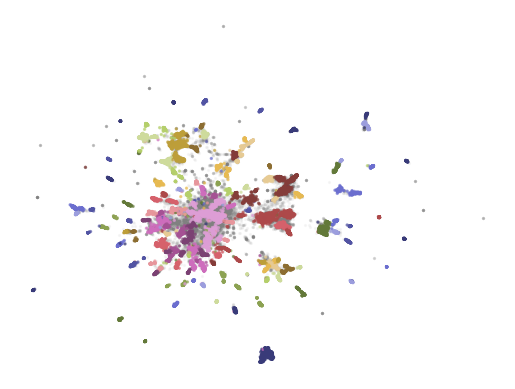

In [ ]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')
# plt.savefig("matplotlib.png", dpi=300)  # Uncomment to save the graph as a .png

# From Text Clustering to Topic Modeling

## **BERTopic: A Modular Topic Modeling Framework**

In [ ]:
!pip install bertopic datasets openai datamapplot

In [ ]:
# Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [ ]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

In [ ]:
from umap import UMAP

# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)

reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

In [ ]:
from bertopic import BERTopic

# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(texts, embeddings)

2024-11-27 02:34:02,221 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-27 02:35:02,117 - BERTopic - Dimensionality - Completed ✓
2024-11-27 02:35:02,120 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-27 02:35:10,365 - BERTopic - Cluster - Completed ✓
2024-11-27 02:35:10,382 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-27 02:35:11,292 - BERTopic - Representation - Completed ✓


Now, let's start exploring the topics that we got by running the code above.

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14743,-1_u002c_user_u2019s_at,"[u002c, user, u2019s, at, to, the, on, and, in...","[""What a great question to ask myself: \""""If t..."
1,0,1139,0_cena_raw_rollins_seth,"[cena, raw, rollins, seth, lesnar, brock, wwe,...","[""John Cena VS Seth Rollins,the winner take al..."
2,1,769,1_game_state_lsu_saturday,"[game, state, lsu, saturday, bowl, ole, vs, ba...",[If Alabama loses to LSU on Saturday\u002c the...
3,2,634,2_arsenal_chelsea_everton_league,"[arsenal, chelsea, everton, league, bolton, un...","[@user @user finished 4th, just like Arsenal.,..."
4,3,578,3_sox_red_white_yankees,"[sox, red, white, yankees, royals, inning, mar...","[Might just go to that Red Sox game on Friday,..."
...,...,...,...,...,...
172,171,60,171_odi_dharamsala_indies_pattinson,"[odi, dharamsala, indies, pattinson, expense, ...","[""West Indies team to go home after the 4th OD..."
173,172,59,172_birthday_happy_nick_21st,"[birthday, happy, nick, 21st, 20th, my, u2019s...",[Happy 18th Birthday to My Best Friend and Big...
174,173,57,173_niall_follow_hope_birthday,"[niall, follow, hope, birthday, loves, me, lov...","[@user may I have a dm with Niall?:)), @user I..."
175,174,56,174_school_enrole_math_sats,"[school, enrole, math, sats, user, cady, grad,...","[@user @user Chelsea goes to school tomorrow, ..."


Hundreds of topics were generated using the default model! To get the top 10 keywords per topic as well as their c-TF-IDF weights, we can use the `get_topic()` function:

In [ ]:
topic_model.get_topic(11)

[('foo', 0.027683262189342767),
 ('fighters', 0.026973733194877853),
 ('show', 0.01585711441630727),
 ('at', 0.015045031009538249),
 ('concert', 0.013319593531414447),
 ('live', 0.011738192241247204),
 ('user', 0.010316979760318432),
 ('bluesfest', 0.009827375053212118),
 ('theatre', 0.00979523814827894),
 ('saturday', 0.00965059990420104)]

We can use the `find_topics()` function to search for specific topics based on a search term. Let’s search for a topic about topic modeling:

In [ ]:
topic_model.find_topics("nancy")

([-1, 129, 166, 83, 72],
 [0.8654741, 0.85727465, 0.85436356, 0.85416806, 0.85355437])

It returns that topic 22 has a relatively high similarity (0.95) with our search term. If we then inspect the topic, we can see that it is indeed a topic about topic modeling:

In [ ]:
topic_model.get_topic(22)

[('dunne', 0.13515848138823774),
 ('paul', 0.10175401920536024),
 ('amateur', 0.04618494035107212),
 ('theopen', 0.036934810350035936),
 ('open', 0.02912633679059497),
 ('theopen2015', 0.02375480444611542),
 ('round', 0.022994410235341906),
 ('tee', 0.020935475577545333),
 ('golf', 0.019163197186582083),
 ('lead', 0.018984244099108993)]

That seems like a topic that is, in part, characterized by the classic LDA technique. Let's see if the BERTopic paper was also assigned to topic 22:

In [ ]:
topic_model.topics_[titles.index('positive')]

72

It is! We expected it might be because there are non-LDA specific words in the topic describtion such as "clustering" and "topic".

### **Visualizations**

**Visualize Documents**

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [ ]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

## **Representation Models**

In these examples that follow, we will update our topic representations **after** having trained our model. This allows for quick iteration. If, however, you want to use a representation model at the start of training, you will need to run it as follows:

```python:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

# Create your representation model
representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)
```

To use the representation models, we are first going to duplicate our topic model such that easily show the differences between a model with and without representation model.

In [ ]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [ ]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

### KeyBERTInspired

In [ ]:
import pandas as pd
from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(texts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,0,cena | raw | rollins | seth | lesnar,summerslam | cena | wwe | wrestlemania | reigns
1,1,game | state | lsu | saturday | bowl,lsu | bama | bcs | alabama | football
2,2,arsenal | chelsea | everton | league | bolton,arsenal | wenger | fc | football | chelsea
3,3,sox | red | white | yankees | royals,sox | mlb | fenway | boston | baseball
4,4,islam | muslims | allah | muslim | may,islam | muslim | muslims | islamic | allah




```
# This is formatted as code
```

### Maximal Marginal Relevance

In [ ]:
from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(texts, representation_model=representation_model)


# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,0,cena | raw | rollins | seth | lesnar,seth | wwe | orton | flair | ambrose
1,1,game | state | lsu | saturday | bowl,game | state | saturday | ole | bama
2,2,arsenal | chelsea | everton | league | bolton,chelsea | everton | derby | saturday | nufc
3,3,sox | red | white | yankees | royals,royals | mariners | kershaw | redsox | verlander
4,4,islam | muslims | allah | muslim | may,muslims | user | guide | not | peace


## Text Generation



### Flan-T5

In [ ]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, is this text positive, negative or neutral sentiment?"""

# Update our topic representations using Flan-T5
generator = pipeline('text2text-generation', model='google/flan-t5-small', device='cuda')
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)
topic_model.update_topics(texts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

100%|██████████| 177/177 [00:07<00:00, 23.19it/s]


,Topic,Original,Updated
0,0,cena | raw | rollins | seth | lesnar,positive | | | |
1,1,game | state | lsu | saturday | bowl,positive | | | |
2,2,arsenal | chelsea | everton | league | bolton,negative | | | |
3,3,sox | red | white | yankees | royals,positive | | | |
4,4,islam | muslims | allah | muslim | may,positive | | | |


### OpenAI

In [ ]:
import openai
from bertopic.representation import OpenAI

prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: [KEYWORDS]

Based on the documents and keywords, label this text positive, negative or neutral?
sentiment: <label>
"""

# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="")
representation_model = OpenAI(
    client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt
)
topic_model.update_topics(texts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

In [ ]:
# Get the topics for each document
doc_topics = topic_model.topics_

# Create the figure
plt.figure(figsize=(12, 8))

# Clean titles of any LaTeX commands
def clean_text(text):
    # Remove or replace LaTeX commands
    import re
    text = re.sub(r'\\textit{([^}]*)}', r'\1', text)  # Replace \textit{text} with just text
    text = re.sub(r'\\[a-zA-Z]+{([^}]*)}', r'\1', text)  # Replace other \commands{text}
    text = text.replace('\\', '')  # Remove remaining backslashes
    return text

cleaned_titles = [clean_text(title) if isinstance(title, str) else str(title) for title in titles]

# Create scatter plot
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=doc_topics,
    cmap='tab20',
    alpha=0.6
)

# Add labels with cleaned text
for i, title in enumerate(cleaned_titles):
    plt.annotate(
        title[:20] + '...' if len(title) > 20 else title,
        (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
        fontsize=8,
        alpha=0.7,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # Add white background to labels
    )

# Add a simple title without LaTeX
plt.title('Document Topic Map', fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Topic Number')

# Save the figure
plt.savefig("datamapplot.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.close()  # Close the figure to free memory


## **BONUS**: Word Cloud

Make sure to pip install `wordcloud` first in order to follow this bonus:


First, we need to make sure that each topic is described by a bit more words than just 10 as that would make for a much more interesting wordcloud.

In [ ]:
topic_model.update_topics(texts, top_n_words=500)

2024-11-27 03:06:41,867 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.


KeyboardInterrupt: 

Then, we can run the following code to generate the wordcloud for our topic modeling topic:

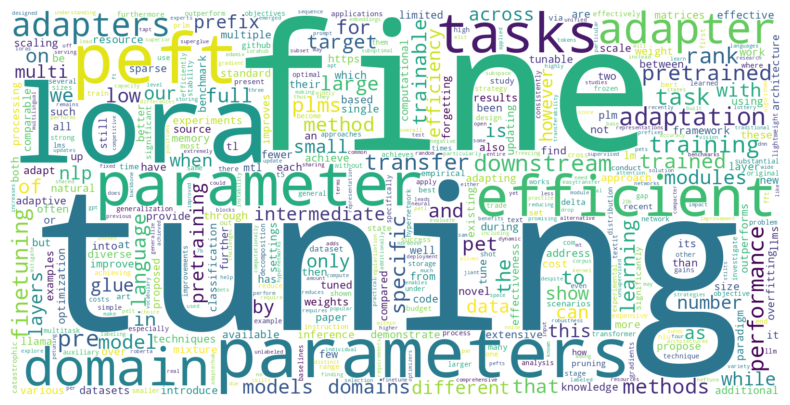

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    plt.figure(figsize=(10,5))
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=17)